<a href="https://colab.research.google.com/github/jailer2024/JAILER-CHAPID-SE-ALES-Y-SISTEMAS/blob/main/taller_jueves_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **PUNTO 1**

In [ ]:

!pip install sympy --upgrade #actualizar sympy para usar módulo de control

In [ ]:
pip install control

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
sym.init_printing()
#definiri variables
t, m, c, k = sym.symbols('t m c k', real=True,positive=True)
s = sym.symbols('s', complex=True)

**Teniendo en cuenta la forma canonica**

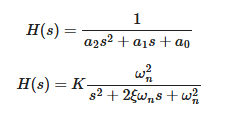

In [ ]:
#forma canónica del slit
a2 = m #CL en circuito equivalente
a1 = c #L/R en circuito equivalente
ao = k # 1 en circuito equivalente

Ko = 1/ao #ganancia circuito forma canónica
wn = sym.sqrt(ao/a2)
xi = a1/(2*a2*sym.sqrt(ao/a2))
#función de transferencia
H = Ko*wn**2/(s**2+2*xi*wn*s+wn**2)
H


       1        
────────────────
  ⎛c⋅s   k    2⎞
m⋅⎜─── + ─ + s ⎟
  ⎝ m    m     ⎠

**Calculando los polos**

In [ ]:


p1 = -xi*wn + 1j*wn*sym.sqrt(1-xi**2)
p2 = -xi*wn - 1j*wn*sym.sqrt(1-xi**2)
p1


                      _____________
                     ╱     2       
                    ╱     c        
        1.0⋅ⅈ⋅√k⋅  ╱   - ───── + 1 
   c             ╲╱      4⋅k⋅m     
- ─── + ───────────────────────────
  2⋅m               √m             

**Para un sistema amortiguado asumimos los siguientes valores**

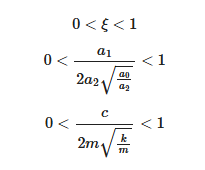

**Asumimos los valores de m=4 ; c=1 ; k=1**

In [ ]:
#Reemplazando los valores
mck = {m: 4.0, c: 1.0, k: 1.0}
mck


{c: 1.0, k: 1.0, m: 4.0}

**Polos y ceros**

In [ ]:

print('p1=',p1.subs(mck))
print('p2=',p2.subs(mck))
print('xi=',xi.subs(mck))
print('omega_n=',wn.subs(mck))

p1= -0.125 + 0.484122918275927*I
p2= -0.125 - 0.484122918275927*I
xi= 0.250000000000000
omega_n= 0.500000000000000


# **EL TIEMPO DE ESTABLECIMIENTO**

In [ ]:
t_s = 6*m / c
print('El tiempo de establecimiento es de: ',t_s.subs(mck))

El tiempo de establecimiento es de:  24.0000000000000


**GRAFICA DE POLOS Y CEROS**

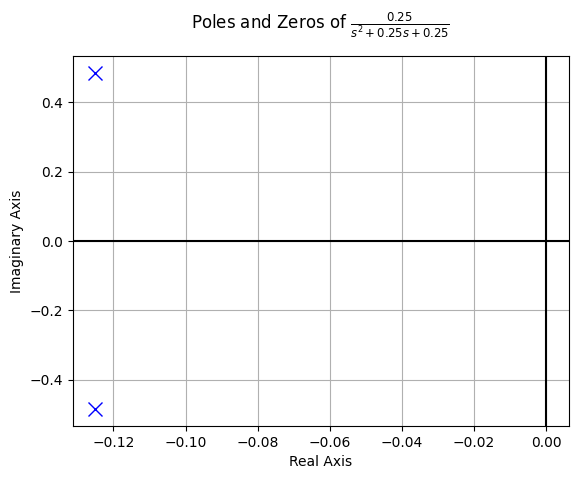

In [ ]:

from sympy.physics.control.lti import TransferFunction
from sympy.physics.control.control_plots import pole_zero_plot, bode_plot, impulse_response_plot, step_response_plot, ramp_response_plot
import control as ctrl
num,den=sym.fraction(H.subs(mck))

tf1 = TransferFunction(num, den, s)#numerados y denomirador función de transferencia con valores evaluados de RLC
pole_zero_plot(tf1)

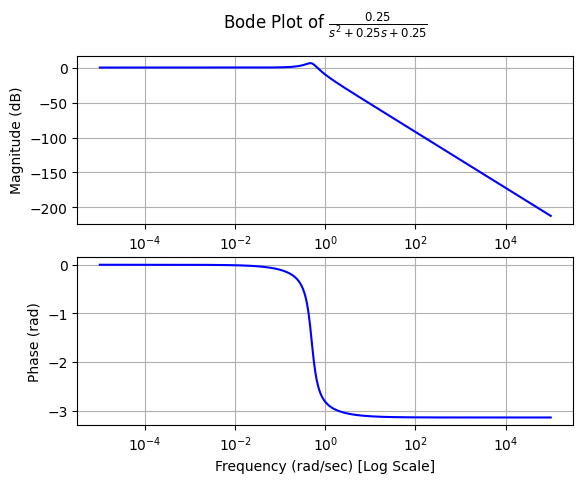

In [ ]:
bode_plot(tf1)

**Respuesta impulso**

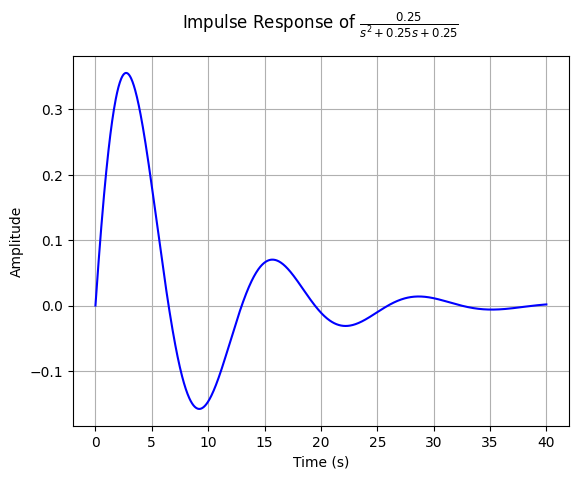

In [ ]:
impulse_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

**Tiempo pico**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import impulse, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = impulse((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

2.8282828282828287

**Respuesta al ewscalon**

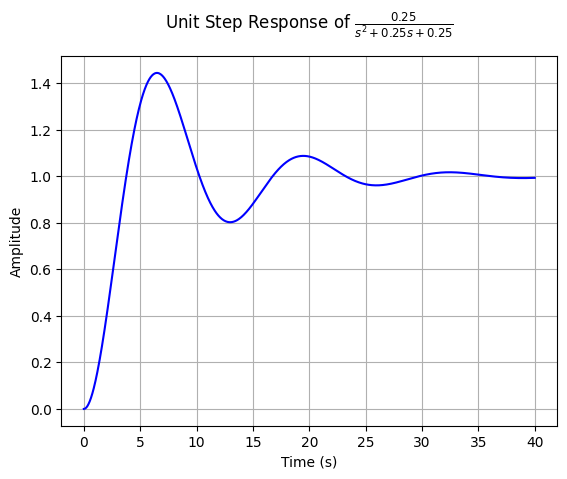

In [ ]:

step_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))

**Tiempo pico**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import step, find_peaks

# Suponiendo que tf1 es tu función de transferencia
# (asegúrate de tener importada la función transfer_function)

# Definir la función de transferencia (sustituye tf1 con tu función)
numerator = [1]
denominator = [4, 1, 1]  # Sistema de segundo orden, por ejemplo

# Obtener la respuesta al impulso
time, response = step((numerator, denominator))

# Encontrar los picos en la respuesta al impulso
peaks, _ = find_peaks(response)

# Encontrar el tiempo correspondiente al primer pico
Tp = time[peaks[0]]
Tp

6.222222222222223

**Respuesta rampa**

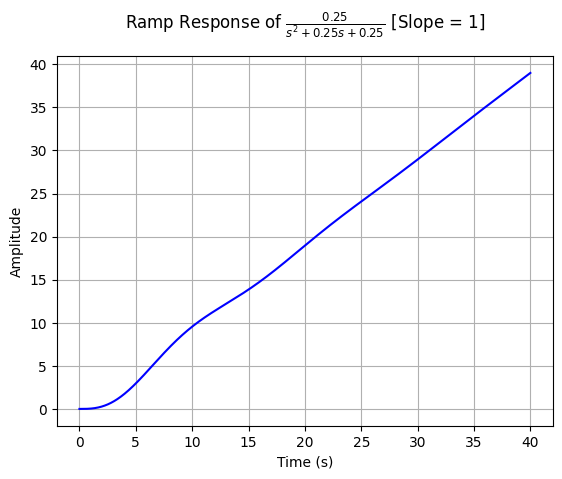

In [ ]:
ramp_response_plot(tf1,upper_limit=5/(xi.subs(mck)*wn.subs(mck)))